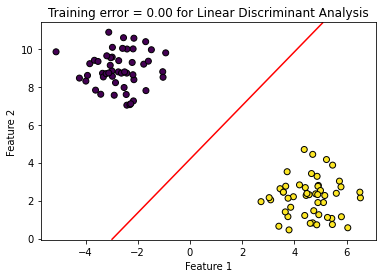

In [2]:
from sklearn.discriminant_analysis \
import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis \
import QuadraticDiscriminantAnalysis
from sklearn.datasets._samples_generator import make_blobs
import scipy.linalg as LA
import numpy as np
import matplotlib.pyplot as plt
data, labels = make_blobs(n_samples=100, centers=2, n_features=2, random_state=42)
n = len(data[:, 0])
X = data[:, 0:2]
y = labels

Lda = LinearDiscriminantAnalysis(tol = 1e-6)
Lda.fit(X, y)
K = Lda.intercept_
L = Lda.coef_
MissClassRateLDA = 1 - Lda.score(X, y)

plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', edgecolors='k')

# 繪製決策邊界
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()

xx, yy = np.meshgrid(np.linspace(xmin, xmax, 100), np.linspace(ymin, ymax, 100))
Z = L[0][0] * xx + L[0][1] * yy + K
plt.contour(xx, yy, Z, levels=[0], colors='red')

plt.title('Training error = {:.2f} for Linear Discriminant Analysis'.format(MissClassRateLDA))
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.savefig("D:/latex/images/lda1.eps", format="eps", dpi=300)
plt.show()

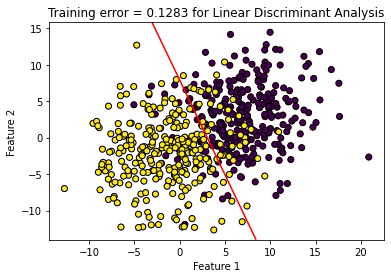

C:\Users\User\AppData\Local\Temp/ipykernel_18516/3631992494.py:65: UserWarning: Trying to register the cmap 'red_blue_classes' which already exists.
  plt.cm.register_cmap(cmap = cmap)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency

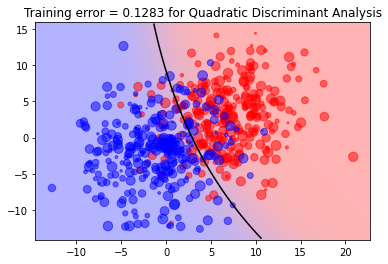

<Figure size 576x432 with 0 Axes>

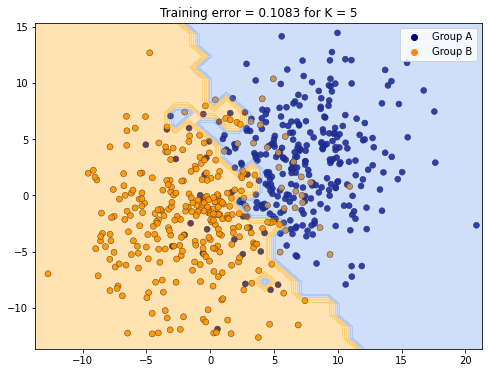

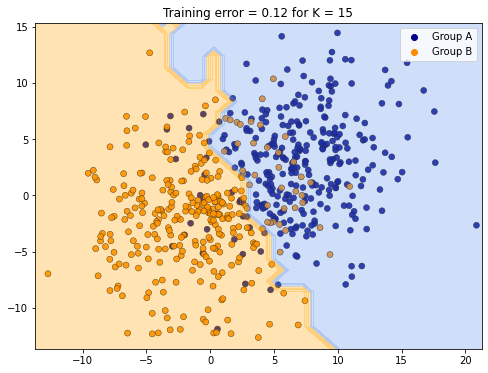

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from matplotlib import colors as mcolors
from scipy.stats import multivariate_normal
from matplotlib.colors import ListedColormap
n1, n2 = 300, 300
m1, m2 = np.array([7, 3]), np.array([-1, -2])
Cov1 = np.array([[15, 1.2], [1.2, 20]])
Cov2 = np.array([[5, 2], [2, 18]])
mvn1 = multivariate_normal(mean = m1, cov = Cov1)
mvn2 = multivariate_normal(mean = m2, cov = Cov1)
A, B = mvn1.rvs(n1), mvn2.rvs(n2)
X = np.vstack((A, B))
y = np.hstack((np.zeros(n1), np.ones(n2)))
np.savetxt('demo_data.txt', np.c_[X, y],\
fmt = "%.4f %.4f %d", header = "X1 X2 y")
colors = ['red' if i == 0 else 'blue' for i in y]
plt.scatter(X[:, 0], X[:, 1], \
c=colors, s=30, marker="o")

Lda = LinearDiscriminantAnalysis(tol = 1e-6)
Lda.fit(X, y)
K = Lda.intercept_
L = Lda.coef_
MissClassRateLDA = 1 - Lda.score(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')

# 繪製決策邊界
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()

xx, yy = np.meshgrid(np.linspace(xmin, xmax, 100), np.linspace(ymin, ymax, 100))
Z = L[0][0] * xx + L[0][1] * yy + K
plt.contour(xx, yy, Z, levels=[0], colors='red')
plt.title('Training error = {:.4f} for Linear Discriminant Analysis'.format(MissClassRateLDA))
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.savefig("D:/latex/images/lda2.eps", format="eps", dpi=300)
plt.show()

area = 2 * np.random.randint(50, size = X[:, 0].size)
grp_color = [[1,0,0] if i == 0 else [0,0,1] for i in y]
plt.scatter(X[:, 0], X[:, 1], c = grp_color, s = area, \
alpha = 0.5, marker = 'o')
Qda = QuadraticDiscriminantAnalysis(\
tol = 1e-6, store_covariance = True)
Qda.fit(X, y)
MissClassRateQDA = 1- Qda.score(X, y)
nx, ny = 100, 100
x1_min, x1_max = plt.xlim()
x2_min, x2_max = plt.ylim()
x1_ = np.linspace(x1_min, x1_max, nx)
x2_ = np.linspace(x2_min, x2_max, ny)
x1,x2  = np.meshgrid(x1_, x2_)
Z = Qda.predict_proba(np.c_[x1.ravel(), x2.ravel()])
Z = Z[:, 1].reshape(x1.shape)
# Define pseudo colors
cdit = {'red': [(0, 1, 1), (1, 0.7, 0.7)],
'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
'blue': [(0, 0.7, 0.7), (1, 1, 1)]}
cmap = mcolors.LinearSegmentedColormap(
'red_blue_classes' ,cdit)
plt.cm.register_cmap(cmap = cmap)
plt.pcolormesh(x1, x2, Z, cmap = 'red_blue_classes',\
norm = mcolors.Normalize(0., 1.),\
shading = 'auto', zorder = 0)
contoursQDA = plt.contour(x1, x2, Z, [0.5],colors = 'k')
plt.title('Training error = {:.4f} for Quadratic Discriminant Analysis'.format(MissClassRateQDA))
plt.savefig("D:/latex/images/qda2.eps", format="eps", dpi=300)
plt.show()


import seaborn as sns
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

y = np.hstack((np.zeros(n1), np.ones(n2))).astype('int')
cmap_bold = ['darkblue', 'darkorange']
Group_name = np.array(["Group A", "Group B"])
# plt.figure(figsize=(8, 6))
# sns.scatterplot(x = X[:, 0], y = X[:, 1], \
# hue = Group_name[y], palette = cmap_bold, \
# alpha = 0.9, edgecolor = "black")


K1, K2 = 5, 15
weights = 'uniform'
Knn1 = KNeighborsClassifier(n_neighbors=K1, weights=weights)
Knn2 = KNeighborsClassifier(n_neighbors=K2, weights=weights)
Knn1.fit(X, y)
Knn2.fit(X, y)

trainingErr1 = 1 - Knn1.score(X, y)
trainingErr2 = 1 - Knn2.score(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1), np.arange(y_min, y_max, 1))

plt.figure(figsize=(8, 6))
# sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Group_name[y], palette=cmap_bold, alpha=0.9, edgecolor="black")

for i, knn, K in zip([1, 2], [Knn1, Knn2], [K1, K2]):
    z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = z.reshape(xx.shape)
    
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Group_name[y], palette=cmap_bold, alpha=0.9, edgecolor="black")
    plt.contourf(xx, yy, Z, cmap=ListedColormap(['cornflowerblue', 'orange']), alpha=0.3)
    plt.title(f'Training error = {np.round(trainingErr1 if i == 1 else trainingErr2, 4)} for K = {K}')
    plt.savefig(f"D:/latex/images/knn2_{i}.png", format="png", dpi=300)
    plt.show()


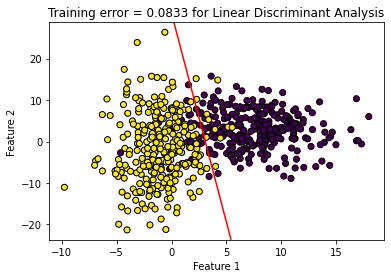

C:\Users\User\AppData\Local\Temp/ipykernel_18516/2984690967.py:65: UserWarning: Trying to register the cmap 'red_blue_classes' which already exists.
  plt.cm.register_cmap(cmap = cmap)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency

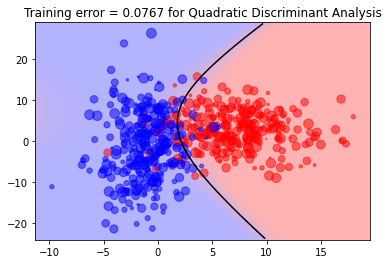

<Figure size 576x432 with 0 Axes>

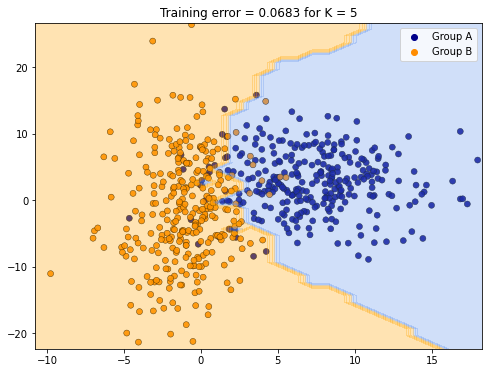

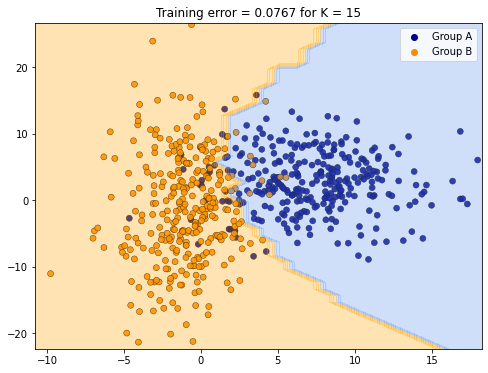

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from matplotlib import colors as mcolors
from scipy.stats import multivariate_normal
from matplotlib.colors import ListedColormap
n1, n2 = 300, 300
m1, m2 = np.array([7, 3]), np.array([-1, -2])
Cov1 = np.array([[15, 1.2], [1.2, 20]])
Cov2 = np.array([[5, 2], [2, 60]])
mvn1 = multivariate_normal(mean = m1, cov = Cov1)
mvn2 = multivariate_normal(mean = m2, cov = Cov2)
A, B = mvn1.rvs(n1), mvn2.rvs(n2)
X = np.vstack((A, B))
y = np.hstack((np.zeros(n1), np.ones(n2)))
np.savetxt('demo_data.txt', np.c_[X, y],\
fmt = "%.4f %.4f %d", header = "X1 X2 y")
colors = ['red' if i == 0 else 'blue' for i in y]
plt.scatter(X[:, 0], X[:, 1], \
c=colors, s=30, marker="o")

Lda = LinearDiscriminantAnalysis(tol = 1e-6)
Lda.fit(X, y)
K = Lda.intercept_
L = Lda.coef_
MissClassRateLDA = 1 - Lda.score(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')

# 繪製決策邊界
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()

xx, yy = np.meshgrid(np.linspace(xmin, xmax, 100), np.linspace(ymin, ymax, 100))
Z = L[0][0] * xx + L[0][1] * yy + K
plt.contour(xx, yy, Z, levels=[0], colors='red')
plt.title('Training error = {:.4f} for Linear Discriminant Analysis'.format(MissClassRateLDA))
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.savefig("D:/latex/images/lda3.eps", format="eps", dpi=300)
plt.show()

area = 2 * np.random.randint(50, size = X[:, 0].size)
grp_color = [[1,0,0] if i == 0 else [0,0,1] for i in y]
plt.scatter(X[:, 0], X[:, 1], c = grp_color, s = area, \
alpha = 0.5, marker = 'o')
Qda = QuadraticDiscriminantAnalysis(\
tol = 1e-6, store_covariance = True)
Qda.fit(X, y)
MissClassRateQDA = 1- Qda.score(X, y)
nx, ny = 100, 100
x1_min, x1_max = plt.xlim()
x2_min, x2_max = plt.ylim()
x1_ = np.linspace(x1_min, x1_max, nx)
x2_ = np.linspace(x2_min, x2_max, ny)
x1,x2  = np.meshgrid(x1_, x2_)
Z = Qda.predict_proba(np.c_[x1.ravel(), x2.ravel()])
Z = Z[:, 1].reshape(x1.shape)
# Define pseudo colors
cdit = {'red': [(0, 1, 1), (1, 0.7, 0.7)],
'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
'blue': [(0, 0.7, 0.7), (1, 1, 1)]}
cmap = mcolors.LinearSegmentedColormap(
'red_blue_classes' ,cdit)
plt.cm.register_cmap(cmap = cmap)
plt.pcolormesh(x1, x2, Z, cmap = 'red_blue_classes',\
norm = mcolors.Normalize(0., 1.),\
shading = 'auto', zorder = 0)
contoursQDA = plt.contour(x1, x2, Z, [0.5],colors = 'k')
plt.title('Training error = {:.4f} for Quadratic Discriminant Analysis'.format(MissClassRateQDA))
plt.savefig("D:/latex/images/qda3.eps", format="eps", dpi=300)
plt.show()


import seaborn as sns
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

y = np.hstack((np.zeros(n1), np.ones(n2))).astype('int')
cmap_bold = ['darkblue', 'darkorange']
Group_name = np.array(["Group A", "Group B"])
# # plt.figure(figsize=(8, 6))
# # sns.scatterplot(x = X[:, 0], y = X[:, 1], \
# hue = Group_name[y], palette = cmap_bold, \
# alpha = 0.9, edgecolor = "black")


K1, K2 = 5, 15
weights = 'uniform'
Knn1 = KNeighborsClassifier(n_neighbors=K1, weights=weights)
Knn2 = KNeighborsClassifier(n_neighbors=K2, weights=weights)
Knn1.fit(X, y)
Knn2.fit(X, y)

trainingErr1 = 1 - Knn1.score(X, y)
trainingErr2 = 1 - Knn2.score(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1), np.arange(y_min, y_max, 1))

plt.figure(figsize=(8, 6))
# sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Group_name[y], palette=cmap_bold, alpha=0.9, edgecolor="black")

for i, knn, K in zip([1, 2], [Knn1, Knn2], [K1, K2]):
    z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = z.reshape(xx.shape)
    
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Group_name[y], palette=cmap_bold, alpha=0.9, edgecolor="black")
    plt.contourf(xx, yy, Z, cmap=ListedColormap(['cornflowerblue', 'orange']), alpha=0.3)
    plt.title(f'Training error = {np.round(trainingErr1 if i == 1 else trainingErr2, 4)} for K = {K}')
    plt.savefig(f"D:/latex/images/knn3_{i}.png", format="png", dpi=300)
    plt.show()


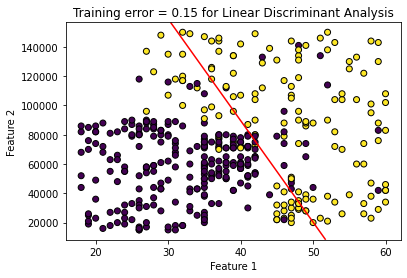

C:\Users\User\AppData\Local\Temp/ipykernel_18516/2585843269.py:52: UserWarning: Trying to register the cmap 'red_blue_classes' which already exists.
  plt.cm.register_cmap(cmap = cmap)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency

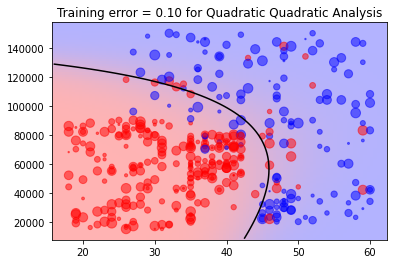

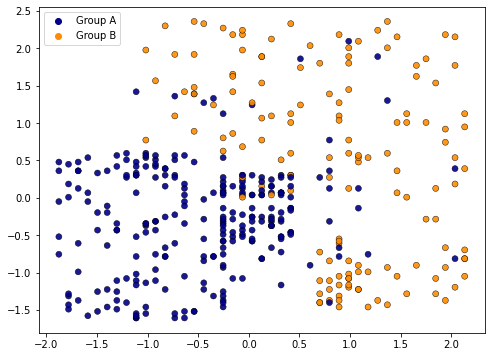

<Figure size 576x432 with 0 Axes>

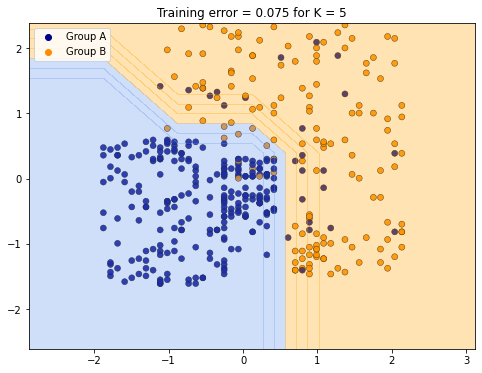

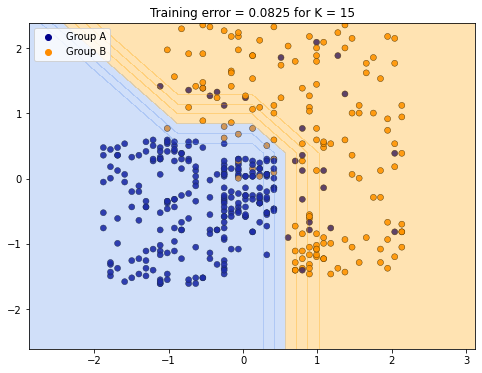

In [86]:
import pandas as pd
d1 = pd.read_csv(f'C:\\Users\\User\\OneDrive\\桌面\\Social_Network_Ads.csv')
d1.head()
X = d1.iloc[ : ,[2,3]].values
y = d1.iloc[ : , 4 ].values
n = len(X[:, 0])

Lda = LinearDiscriminantAnalysis(tol = 1e-6)
Lda.fit(X, y)
K = Lda.intercept_
L = Lda.coef_
MissClassRateLDA = 1 - Lda.score(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')

# 繪製決策邊界
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()

xx, yy = np.meshgrid(np.linspace(xmin, xmax, 100), np.linspace(ymin, ymax, 100))
Z = L[0][0] * xx + L[0][1] * yy + K
plt.contour(xx, yy, Z, levels=[0], colors='red')


plt.title('Training error = {:.2f} for Linear Discriminant Analysis'.format(MissClassRateLDA))
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
# plt.savefig("D:/latex/images/lda4.eps", format="eps", dpi=300)
plt.show()

area = 2 * np.random.randint(50, size = X[:, 0].size)
grp_color = [[1,0,0] if i == 0 else [0,0,1] for i in y]
plt.scatter(X[:, 0], X[:, 1], c = grp_color, s = area, \
alpha = 0.5, marker = 'o')
Qda = QuadraticDiscriminantAnalysis(\
tol = 1e-6, store_covariance = True)
Qda.fit(X, y)
MissClassRateQDA = 1-Qda.score(X, y)
nx, ny = 100, 100
x1_min, x1_max = plt.xlim()
x2_min, x2_max = plt.ylim()
x1_ = np.linspace(x1_min, x1_max, nx)
x2_ = np.linspace(x2_min, x2_max, ny)
x1,x2  = np.meshgrid(x1_, x2_)
Z = Qda.predict_proba(np.c_[x1.ravel(), x2.ravel()])
Z = Z[:, 1].reshape(x1.shape)
# Define pseudo colors
cdit = {'red': [(0, 1, 1), (1, 0.7, 0.7)],
'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
'blue': [(0, 0.7, 0.7), (1, 1, 1)]}
cmap = mcolors.LinearSegmentedColormap(
'red_blue_classes' ,cdit)
plt.cm.register_cmap(cmap = cmap)
plt.pcolormesh(x1, x2, Z, cmap = 'red_blue_classes',\
norm = mcolors.Normalize(0., 1.),\
shading = 'auto', zorder = 0)
contoursQDA = plt.contour(x1, x2, Z, [0.5],colors = 'k')
plt.title('Training error = {:.2f} for Quadratic Quadratic Analysis'.format(MissClassRateQDA))

plt.savefig("D:/latex/images/qda4.eps", format="eps", dpi=300)
plt.show()

import seaborn as sns
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = d1.iloc[ : ,[2,3]].values
X = scaler.fit_transform(X)
cmap_bold = ['darkblue', 'darkorange']
Group_name = np.array(["Group A", "Group B"])
plt.figure(figsize=(8, 6))
sns.scatterplot(x = X[:, 0], y = X[:, 1], \
hue = Group_name[y], palette = cmap_bold, \
alpha = 0.9, edgecolor = "black")


K1, K2 = 5, 15
weights = 'uniform'
Knn1 = KNeighborsClassifier(n_neighbors=K1, weights=weights)
Knn2 = KNeighborsClassifier(n_neighbors=K2, weights=weights)
Knn1.fit(X, y)
Knn2.fit(X, y)

trainingErr1 = 1 - Knn1.score(X, y)
trainingErr2 = 1 - Knn2.score(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1), np.arange(y_min, y_max, 1))

plt.figure(figsize=(8, 6))
# sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Group_name[y], palette=cmap_bold, alpha=0.9, edgecolor="black")

for i, knn, K in zip([1, 2], [Knn1, Knn2], [K1, K2]):
    z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = z.reshape(xx.shape)
    
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Group_name[y], palette=cmap_bold, alpha=0.9, edgecolor="black")
    plt.contourf(xx, yy, Z, cmap=ListedColormap(['cornflowerblue', 'orange']), alpha=0.3)
    plt.title(f'Training error = {np.round(trainingErr1 if i == 1 else trainingErr2, 4)} for K = {K}')
    plt.savefig(f"D:/latex/images/knn4_{i}.png", format="png", dpi=300)
    plt.show()


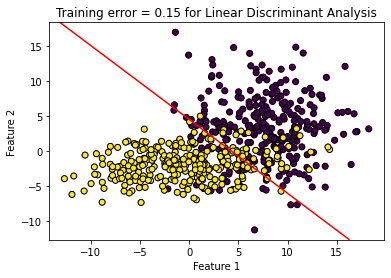

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
n1, n2 = 300, 300
m1, m2 = np.array([7, 3]), np.array([-1, -2])
Cov1 = np.array([[15, 0], [0, 20]])
Cov2 = np.array([[25, 2], [2, 5]])
mvn1 = multivariate_normal(mean = m1, cov = Cov1)
mvn2 = multivariate_normal(mean = m2, cov = Cov2)
A, B = mvn1.rvs(n1), mvn2.rvs(n2)
X = np.vstack((A, B))
y = np.hstack((np.zeros(n1), np.ones(n2)))
np.savetxt('demo_data.txt', np.c_[X, y],\
fmt = "%.4f %.4f %d", header = "X1 X2 y")
colors = ['red' if i == 0 else 'blue' for i in y]
plt.scatter(X[:, 0], X[:, 1], \
c=colors, s=30, marker="o")

Lda = LinearDiscriminantAnalysis(tol = 1e-6)
Lda.fit(X, y)
K = Lda.intercept_
L = Lda.coef_
MissClassRateLDA = 1 - Lda.score(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')

# 繪製決策邊界
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()

xx, yy = np.meshgrid(np.linspace(xmin, xmax, 100), np.linspace(ymin, ymax, 100))
Z = L[0][0] * xx + L[0][1] * yy + K
plt.contour(xx, yy, Z, levels=[0], colors='red')


plt.title('Training error = {:.2f} for Linear Discriminant Analysis'.format(MissClassRateLDA))
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.savefig("D:/latex/images/lda3.eps", format="eps", dpi=300)
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

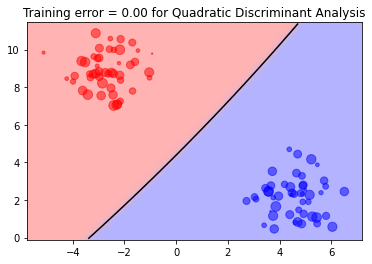

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from matplotlib import colors
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from matplotlib import colors as mcolors
data, labels = make_blobs(n_samples=100, centers=2, n_features=2, random_state=42)
n = len(data[:, 0])
X = data[:, 0:2]
y = labels

area = 2 * np.random.randint(50, size = X[:, 0].size)
grp_color = [[1,0,0] if i == 0 else [0,0,1] for i in y]
plt.scatter(X[:, 0], X[:, 1], c = grp_color, s = area, \
alpha = 0.5, marker = 'o')
Qda = QuadraticDiscriminantAnalysis(\
tol = 1e-6, store_covariance = True)
Qda.fit(X, y)
MissClassRateQDA=1 - Qda.score(X, y)
nx, ny = 100, 100
x1_min, x1_max = plt.xlim()
x2_min, x2_max = plt.ylim()
x1_ = np.linspace(x1_min, x1_max, nx)
x2_ = np.linspace(x2_min, x2_max, ny)
x1,x2  = np.meshgrid(x1_, x2_)
Z = Qda.predict_proba(np.c_[x1.ravel(), x2.ravel()])
Z = Z[:, 1].reshape(x1.shape)
# Define pseudo colors
cdit = {'red': [(0, 1, 1), (1, 0.7, 0.7)],
'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
'blue': [(0, 0.7, 0.7), (1, 1, 1)]}
cmap = mcolors.LinearSegmentedColormap(
'red_blue_classes' ,cdit)
plt.cm.register_cmap(cmap = cmap)
plt.pcolormesh(x1, x2, Z, cmap = 'red_blue_classes',\
norm = mcolors.Normalize(0., 1.),\
shading = 'auto', zorder = 0)
contoursQDA = plt.contour(x1, x2, Z, [0.5],colors = 'k')
plt.title('Training error = {:.2f} for Quadratic Discriminant Analysis'.format(MissClassRateQDA))

plt.savefig("D:/latex/images/qda1.eps", format="eps", dpi=300)

C:\Users\User\AppData\Local\Temp/ipykernel_20832/829602322.py:34: UserWarning: Trying to register the cmap 'red_blue_classes' which already exists.
  plt.cm.register_cmap(cmap = cmap)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency;

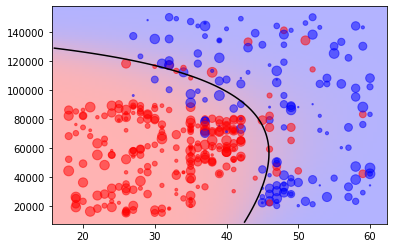

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from matplotlib import colors
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from matplotlib import colors as mcolors
d1 = pd.read_csv(f'C:\\Users\\User\\OneDrive\\桌面\\Social_Network_Ads.csv')
d1.head()
X = d1.iloc[ : ,[2,3]].values
y = d1.iloc[ : , 4 ].values
n = len(X[:, 0])

area = 2 * np.random.randint(50, size = X[:, 0].size)
grp_color = [[1,0,0] if i == 0 else [0,0,1] for i in y]
plt.scatter(X[:, 0], X[:, 1], c = grp_color, s = area, \
alpha = 0.5, marker = 'o')
Qda = QuadraticDiscriminantAnalysis(\
tol = 1e-6, store_covariance = True)
Qda.fit(X, y)
nx, ny = 100, 100
x1_min, x1_max = plt.xlim()
x2_min, x2_max = plt.ylim()
x1_ = np.linspace(x1_min, x1_max, nx)
x2_ = np.linspace(x2_min, x2_max, ny)
x1,x2  = np.meshgrid(x1_, x2_)
Z = Qda.predict_proba(np.c_[x1.ravel(), x2.ravel()])
Z = Z[:, 1].reshape(x1.shape)
# Define pseudo colors
cdit = {'red': [(0, 1, 1), (1, 0.7, 0.7)],
'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
'blue': [(0, 0.7, 0.7), (1, 1, 1)]}
cmap = mcolors.LinearSegmentedColormap(
'red_blue_classes' ,cdit)
plt.cm.register_cmap(cmap = cmap)
plt.pcolormesh(x1, x2, Z, cmap = 'red_blue_classes',\
norm = mcolors.Normalize(0., 1.),\
shading = 'auto', zorder = 0)
contoursQDA = plt.contour(x1, x2, Z, [0.5],colors = 'k')
plt.savefig("D:/latex/images/qda2.eps", format="eps", dpi=300)

C:\Users\User\AppData\Local\Temp/ipykernel_20832/137172205.py:43: UserWarning: Trying to register the cmap 'red_blue_classes' which already exists.
  plt.cm.register_cmap(cmap = cmap)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency;

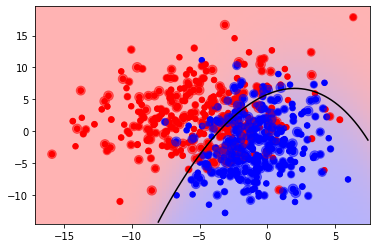

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from matplotlib import colors
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from matplotlib import colors as mcolors
n1, n2 = 300, 300
m1, m2 = np.array([-5, 3]), np.array([-1, -2])
Cov1 = np.array([[15, 1.2], [1.2, 20]])
Cov2 = np.array([[5, 2], [2, 18]])
mvn1 = multivariate_normal(mean = m1, cov = Cov1)
mvn2 = multivariate_normal(mean = m2, cov = Cov2)
A, B = mvn1.rvs(n1), mvn2.rvs(n2)
X = np.vstack((A, B))
y = np.hstack((np.zeros(n1), np.ones(n2)))
np.savetxt('demo_data.txt', np.c_[X, y],\
fmt = "%.4f %.4f %d", header = "X1 X2 y")
colors = ['red' if i == 0 else 'blue' for i in y]
plt.scatter(X[:, 0], X[:, 1], \
c=colors, s=30, marker="o")

area = 2 * np.random.randint(50, size = X[:, 0].size)
grp_color = [[1,0,0] if i == 0 else [0,0,1] for i in y]
plt.scatter(X[:, 0], X[:, 1], c = grp_color, s = area, \
alpha = 0.5, marker = 'o')
Qda = QuadraticDiscriminantAnalysis(\
tol = 1e-6, store_covariance = True)
Qda.fit(X, y)
nx, ny = 100, 100
x1_min, x1_max = plt.xlim()
x2_min, x2_max = plt.ylim()
x1_ = np.linspace(x1_min, x1_max, nx)
x2_ = np.linspace(x2_min, x2_max, ny)
x1,x2  = np.meshgrid(x1_, x2_)
Z = Qda.predict_proba(np.c_[x1.ravel(), x2.ravel()])
Z = Z[:, 1].reshape(x1.shape)
# Define pseudo colors
cdit = {'red': [(0, 1, 1), (1, 0.7, 0.7)],
'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
'blue': [(0, 0.7, 0.7), (1, 1, 1)]}
cmap = mcolors.LinearSegmentedColormap(
'red_blue_classes' ,cdit)
plt.cm.register_cmap(cmap = cmap)
plt.pcolormesh(x1, x2, Z, cmap = 'red_blue_classes',\
norm = mcolors.Normalize(0., 1.),\
shading = 'auto', zorder = 0)
contoursQDA = plt.contour(x1, x2, Z, [0.5],colors = 'k')

plt.savefig("D:/latex/images/qda3.eps", format="eps", dpi=300)

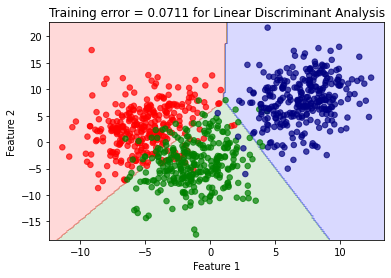

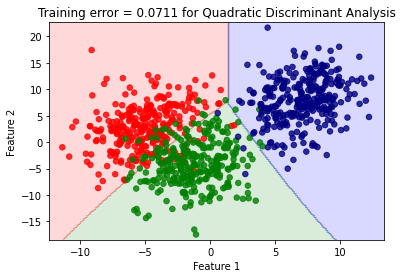

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

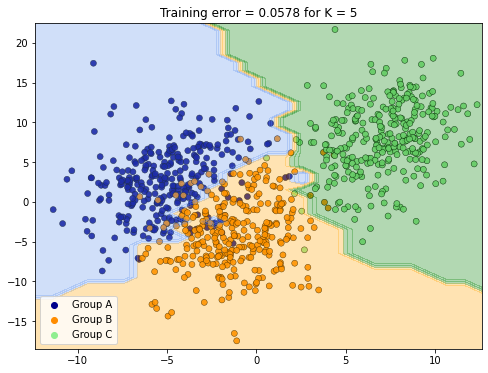

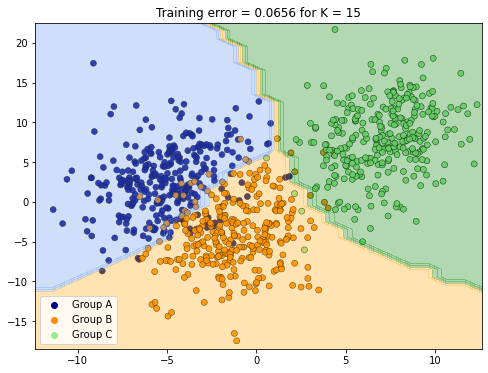

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from matplotlib import colors
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from matplotlib import colors as mcolors
n1, n2, n3 = 300, 300, 300
m1, m2 ,m3= np.array([-5, 3]), np.array([-1, -4]), np.array([7, 8])
Cov1 = np.array([[30, 4], [4, 20]])
Cov2 = np.array([[5, 2], [2, 18]])
Cov3 = np.array([[10, 0], [0, 5]])
mvn1 = multivariate_normal(mean = m1, cov = Cov2)
mvn2 = multivariate_normal(mean = m2, cov = Cov2)
mvn3 = multivariate_normal(mean = m3, cov = Cov2)
A, B ,C= mvn1.rvs(n1), mvn2.rvs(n2), mvn3.rvs(n3)
X = np.vstack((A, B, C))
y = np.hstack((np.zeros(n1), np.ones(n2),np.ones(n3)+1))
np.savetxt('demo_data.txt', np.c_[X, y],\
fmt = "%.4f %.4f %d", header = "X1 X2 y")
colors = ['red' if i == 0 else 'green' if i == 1 else 'navy' for i in y]

# plt.scatter(X[:, 0], X[:, 1], \
# c=colors, s=30, cmap='viridis',marker="o")

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# 使用 LDA 建立模型
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)
MissClassRateLDA = 1 - lda.score(X, y)
nx, ny = 200, 200
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx), np.linspace(y_min, y_max, ny))

# 對網格中的點進行預測
ZL = lda.predict(np.c_[xx.ravel(), yy.ravel()])
ZL = ZL.reshape(xx.shape)

# 繪製決策邊界和數據點
custom_cmap = plt.cm.colors.ListedColormap(['red', 'green', 'blue'])
plt.contourf(xx, yy, ZL, cmap=custom_cmap, alpha=0.15)
plt.scatter(X[:, 0], X[:, 1], \
c=colors, s=30, cmap='viridis',marker="o",alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Training error = {:.4f} for Linear Discriminant Analysis'.format(MissClassRateLDA))
plt.savefig("D:/latex/images/lda33.png", format="png", dpi=300)
plt.show()

qda = QuadraticDiscriminantAnalysis()
qda.fit(X, y)
MissClassRateQDA = 1 - qda.score(X, y)


ZQ = qda.predict(np.c_[xx.ravel(), yy.ravel()])
ZQ = ZQ.reshape(xx.shape)

custom_cmap = plt.cm.colors.ListedColormap(['red', 'green', 'blue'])
plt.contourf(xx, yy, ZQ, cmap=custom_cmap, alpha=0.15)
plt.scatter(X[:, 0], X[:, 1], c=colors, s=30, cmap='viridis', marker="o",alpha=0.8)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Training error = {:.4f} for Quadratic Discriminant Analysis'.format(MissClassRateQDA))
plt.savefig("D:/latex/images/qda33.png", format="png", dpi=300)
plt.show()

import seaborn as sns
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

y = y.astype('int')
cmap_bold = ['darkblue', 'darkorange','lightgreen']
Group_name = np.array(["Group A", "Group B", "Group C"])
plt.figure(figsize=(8, 6))
# sns.scatterplot(x = X[:, 0], y = X[:, 1], \
# hue = Group_name[y], palette = cmap_bold, \
# alpha = 1, edgecolor = "black")


K1, K2 = 5, 15
weights = 'uniform'
Knn1 = KNeighborsClassifier(n_neighbors=K1, weights=weights)
Knn2 = KNeighborsClassifier(n_neighbors=K2, weights=weights)
Knn1.fit(X, y)
Knn2.fit(X, y)

trainingErr1 = 1 - Knn1.score(X, y)
trainingErr2 = 1 - Knn2.score(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1), np.arange(y_min, y_max, 1))

plt.figure(figsize=(8, 6))
# sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Group_name[y], palette=cmap_bold, alpha=0.9, edgecolor="black")

for i, knn, K in zip([1, 2], [Knn1, Knn2], [K1, K2]):
    z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = z.reshape(xx.shape)
    
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Group_name[y], palette=cmap_bold, alpha=0.9, edgecolor="black")
    plt.contourf(xx, yy, Z, cmap= ListedColormap(['cornflowerblue', 'orange','green']), alpha=0.3)
    plt.title(f'Training error = {np.round(trainingErr1 if i == 1 else trainingErr2, 4)} for K = {K}')
    plt.savefig(f"D:/latex/images/knn33_{i}.png", format="png", dpi=300)
    plt.show()


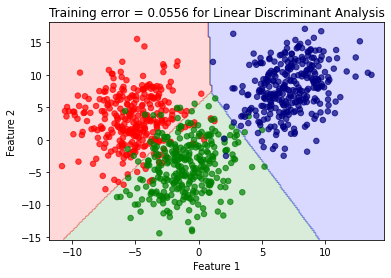

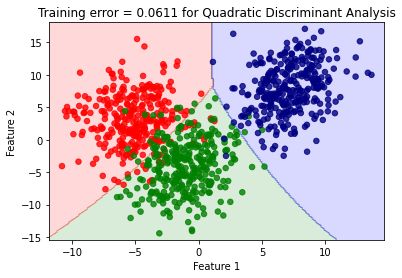

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

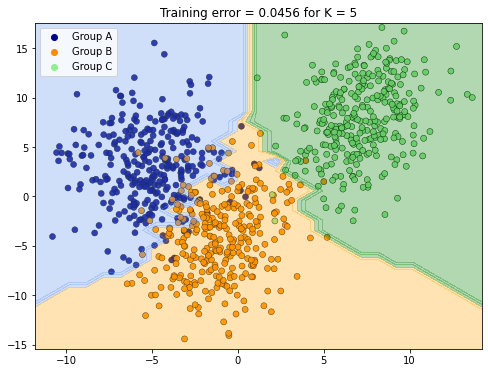

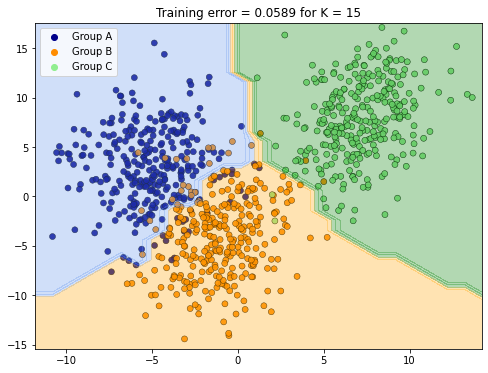

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from matplotlib import colors
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from matplotlib import colors as mcolors
n1, n2, n3 = 300, 300, 300
m1, m2 ,m3= np.array([-5, 3]), np.array([-1, -4]), np.array([7, 8])
Cov1 = np.array([[30, 4], [4, 20]])
Cov2 = np.array([[5, 2], [2, 18]])
Cov3 = np.array([[10, 0], [0, 5]])
mvn1 = multivariate_normal(mean = m1, cov = Cov2)
mvn2 = multivariate_normal(mean = m2, cov = Cov2)
mvn3 = multivariate_normal(mean = m3, cov = Cov2)
A, B ,C= mvn1.rvs(n1), mvn2.rvs(n2), mvn3.rvs(n3)
X = np.vstack((A, B, C))
y = np.hstack((np.zeros(n1), np.ones(n2),np.ones(n3)+1))
np.savetxt('demo_data.txt', np.c_[X, y],\
fmt = "%.4f %.4f %d", header = "X1 X2 y")
colors = ['red' if i == 0 else 'green' if i == 1 else 'navy' for i in y]

# plt.scatter(X[:, 0], X[:, 1], \
# c=colors, s=30, cmap='viridis',marker="o")

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# 使用 LDA 建立模型
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)
MissClassRateLDA = 1 - lda.score(X, y)
nx, ny = 200, 200
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx), np.linspace(y_min, y_max, ny))

# 對網格中的點進行預測
ZL = lda.predict(np.c_[xx.ravel(), yy.ravel()])
ZL = ZL.reshape(xx.shape)

# 繪製決策邊界和數據點
custom_cmap = plt.cm.colors.ListedColormap(['red', 'green', 'blue'])
plt.contourf(xx, yy, ZL, cmap=custom_cmap, alpha=0.15)
plt.scatter(X[:, 0], X[:, 1], \
c=colors, s=30, cmap='viridis',marker="o",alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Training error = {:.4f} for Linear Discriminant Analysis'.format(MissClassRateLDA))
plt.savefig("D:/latex/images/lda32.png", format="png", dpi=300)
plt.show()

qda = QuadraticDiscriminantAnalysis()
qda.fit(X, y)
MissClassRateQDA = 1 - qda.score(X, y)


ZQ = qda.predict(np.c_[xx.ravel(), yy.ravel()])
ZQ = ZQ.reshape(xx.shape)

custom_cmap = plt.cm.colors.ListedColormap(['red', 'green', 'blue'])
plt.contourf(xx, yy, ZQ, cmap=custom_cmap, alpha=0.15)
plt.scatter(X[:, 0], X[:, 1], c=colors, s=30, cmap='viridis', marker="o",alpha=0.8)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Training error = {:.4f} for Quadratic Discriminant Analysis'.format(MissClassRateQDA))
plt.savefig("D:/latex/images/qda32.png", format="png", dpi=300)
plt.show()

import seaborn as sns
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

y = y.astype('int')
cmap_bold = ['darkblue', 'darkorange','lightgreen']
Group_name = np.array(["Group A", "Group B", "Group C"])
plt.figure(figsize=(8, 6))
# sns.scatterplot(x = X[:, 0], y = X[:, 1], \
# hue = Group_name[y], palette = cmap_bold, \
# alpha = 1, edgecolor = "black")


K1, K2 = 5, 15
weights = 'uniform'
Knn1 = KNeighborsClassifier(n_neighbors=K1, weights=weights)
Knn2 = KNeighborsClassifier(n_neighbors=K2, weights=weights)
Knn1.fit(X, y)
Knn2.fit(X, y)

trainingErr1 = 1 - Knn1.score(X, y)
trainingErr2 = 1 - Knn2.score(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1), np.arange(y_min, y_max, 1))

plt.figure(figsize=(8, 6))
# sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Group_name[y], palette=cmap_bold, alpha=0.9, edgecolor="black")

for i, knn, K in zip([1, 2], [Knn1, Knn2], [K1, K2]):
    z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = z.reshape(xx.shape)
    
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Group_name[y], palette=cmap_bold, alpha=0.9, edgecolor="black")
    plt.contourf(xx, yy, Z, cmap= ListedColormap(['cornflowerblue', 'orange','green']), alpha=0.3)
    plt.title(f'Training error = {np.round(trainingErr1 if i == 1 else trainingErr2, 4)} for K = {K}')
    plt.savefig(f"D:/latex/images/knn32_{i}.png", format="png", dpi=300)
    plt.show()


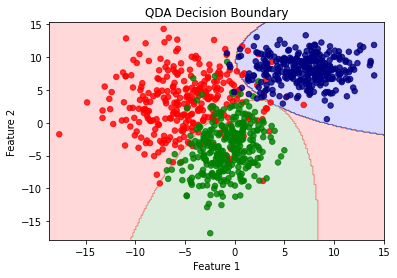

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

n1, n2, n3 = 300, 300, 300
m1, m2 ,m3= np.array([-5, 3]), np.array([-1, -4]), np.array([7, 8])
Cov1 = np.array([[15, 1.2], [1.2, 20]])
Cov2 = np.array([[5, 2], [2, 18]])
Cov3 = np.array([[10, 0], [0, 5]])
mvn1 = multivariate_normal(mean=m1, cov=Cov1)
mvn2 = multivariate_normal(mean=m2, cov=Cov2)
mvn3 = multivariate_normal(mean=m3, cov=Cov3)
A, B, C = mvn1.rvs(n1), mvn2.rvs(n2), mvn3.rvs(n3)
X = np.vstack((A, B, C))
y = np.hstack((np.zeros(n1), np.ones(n2), np.ones(n3) + 1))
np.savetxt('demo_data.txt', np.c_[X, y], fmt="%.4f %.4f %d", header="X1 X2 y")

colors = ['red' if i == 0 else 'green' if i == 1 else 'navy' for i in y]

# plt.scatter(X[:, 0], X[:, 1], c=colors, s=30, cmap='viridis', marker="o")

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# 使用 QDA 建立模型
qda = QuadraticDiscriminantAnalysis()

# 使用 qda 擬合數據
qda.fit(X, y)

nx, ny = 200, 200
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx), np.linspace(y_min, y_max, ny))

# 對網格中的點進行預測
Z = qda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 繪製決策邊界和數據點
custom_cmap = plt.cm.colors.ListedColormap(['red', 'green', 'blue'])
plt.contourf(xx, yy, Z, cmap=custom_cmap, alpha=0.15)
plt.scatter(X[:, 0], X[:, 1], c=colors, s=30, cmap='viridis', marker="o",alpha=0.8)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('QDA Decision Boundary')

# plt.savefig("D:/latex/images/qda33.eps", format="eps", dpi=300)
plt.show()

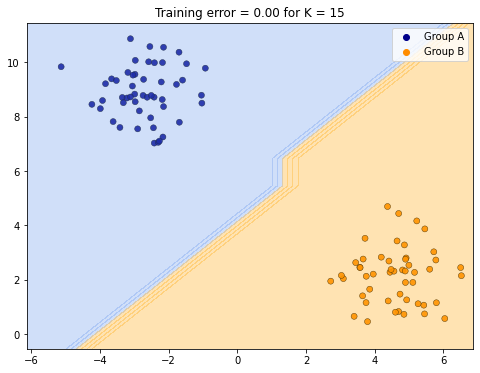

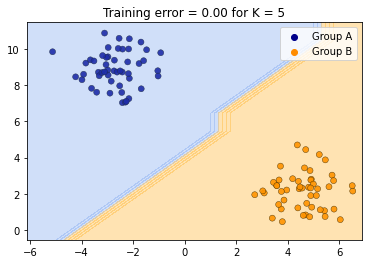

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets._samples_generator import make_blobs
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
data, labels = make_blobs(n_samples=100, centers=2, n_features=2, random_state=42)
n = len(data[:, 0])
X = data[:, 0:2]
y = labels

cmap_bold = ['darkblue', 'darkorange']
Group_name = np.array(["Group A", "Group B"])
plt.figure(figsize=(8, 6))
sns.scatterplot(x = X[:, 0], y = X[:, 1], \
hue = Group_name[y], palette = cmap_bold, \
alpha = 0.9, edgecolor = "black")


K1 = 15
K2=5
weights = 'uniform'
Knn1 = neighbors.KNeighborsClassifier(K1, weights = weights)
Knn2 = neighbors.KNeighborsClassifier(K2, weights = weights)
Knn1.fit(X, y)
Knn2.fit(X, y)
trainingErr1 = 1 - Knn1.score(X, y)
trainingErr2 = 1 - Knn2.score(X, y)
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1),\
np.arange(y_min, y_max, 1))
z1 = Knn1.predict(np.c_[xx.ravel(), yy.ravel()])
z2 = Knn2.predict(np.c_[xx.ravel(), yy.ravel()])
Z1 = z1.reshape(xx.shape)
Z2 = z2.reshape(xx.shape)
cmap_light = ListedColormap(['cornflowerblue', 'orange'])
plt.contourf(xx, yy, Z1, cmap = cmap_light, alpha = 0.3)
plt.title('Training error = %.2f for K = %i' % (trainingErr1,K1))
plt.savefig("D:/latex/images/knn1.png", format="png", dpi=300)
plt.show()
sns.scatterplot(x = X[:, 0], y = X[:, 1], \
hue = Group_name[y], palette = cmap_bold, \
alpha = 0.9, edgecolor = "black")
plt.contourf(xx, yy, Z2, cmap = cmap_light, alpha = 0.3)
plt.title('Training error = %.2f for K = %i' % (trainingErr2,K2))
plt.savefig("D:/latex/images/knn1_2.png", format="png", dpi=300)

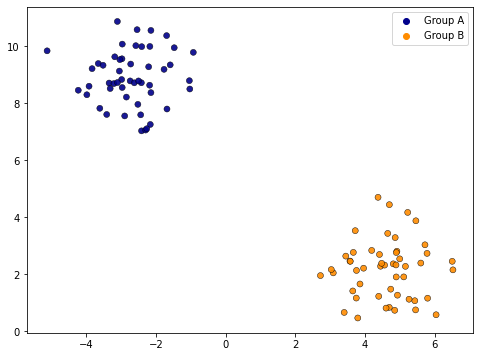

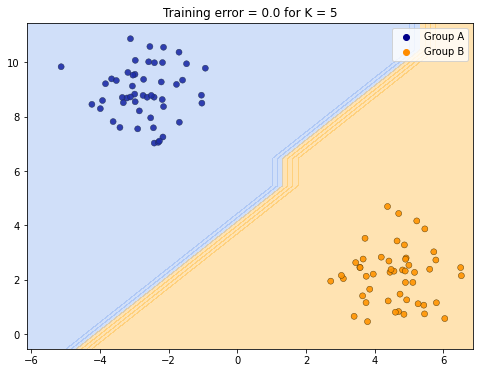

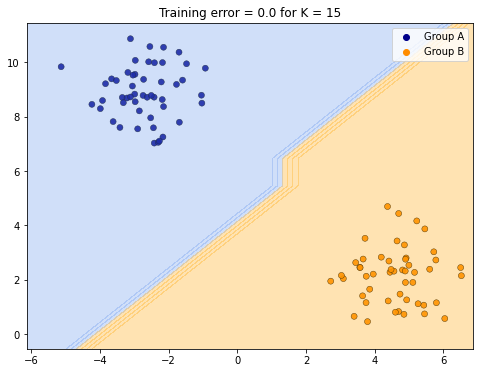

In [72]:
from sklearn.datasets import make_blobs
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

data, labels = make_blobs(n_samples=100, centers=2, n_features=2, random_state=42)
X, y = data[:, :2], labels

cmap_bold = ['darkblue', 'darkorange']
Group_name = np.array(["Group A", "Group B"])

K1, K2 = 5, 15
weights = 'uniform'
Knn1 = KNeighborsClassifier(n_neighbors=K1, weights=weights)
Knn2 = KNeighborsClassifier(n_neighbors=K2, weights=weights)
Knn1.fit(X, y)
Knn2.fit(X, y)

trainingErr1 = 1 - Knn1.score(X, y)
trainingErr2 = 1 - Knn2.score(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1), np.arange(y_min, y_max, 1))

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Group_name[y], palette=cmap_bold, alpha=0.9, edgecolor="black")

for i, knn, K in zip([1, 2], [Knn1, Knn2], [K1, K2]):
    z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = z.reshape(xx.shape)
    
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Group_name[y], palette=cmap_bold, alpha=0.9, edgecolor="black")
    plt.contourf(xx, yy, Z, cmap=ListedColormap(['cornflowerblue', 'orange']), alpha=0.3)
    plt.title(f'Training error = {round(trainingErr1 if i == 1 else trainingErr2, 2)} for K = {K}')
    plt.savefig(f"D:/latex/images/knn1_{i}.png", format="png", dpi=300)
    plt.show()

# for i, knn, K in zip([1, 2], [Knn1, Knn2], [K1, K2]):
#     z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
#     Z = z.reshape(xx.shape)
    
#     sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=Group_name[y], palette=cmap_bold, alpha=0.9, edgecolor="black")
#     plt.contourf(xx, yy, Z, cmap=ListedColormap(['cornflowerblue', 'orange']), alpha=0.3)
#     plt.title(f'Training error = {round(trainingErr1 if i == 1 else trainingErr2, 2)} for K = {K}')
#     plt.savefig(f"D:/latex/images/knn1_{i}.png", format="png", dpi=300)
#     plt.show()



Text(0.5, 1.0, 'Training error = 0.0825 for K = 15')

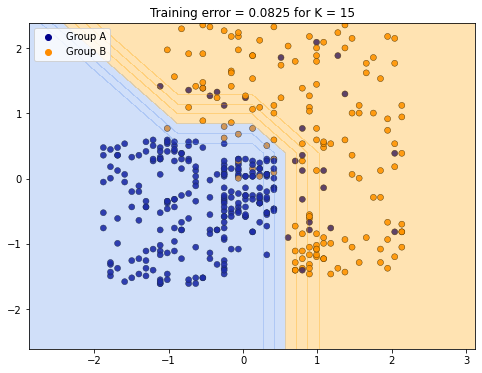

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
d1 = pd.read_csv(f'C:\\Users\\User\\OneDrive\\桌面\\Social_Network_Ads.csv')
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = d1.iloc[ : ,[2,3]].values
X = scaler.fit_transform(X)
y = d1.iloc[ : , 4 ].values
n = len(X[:, 0])

cmap_bold = ['darkblue', 'darkorange']
Group_name = np.array(["Group A", "Group B"])
plt.figure(figsize=(8, 6))
sns.scatterplot(x = X[:, 0], y = X[:, 1], \
hue = Group_name[y], palette = cmap_bold, \
alpha = 0.9, edgecolor = "black")


K = 15
weights = 'uniform'
Knn = neighbors.KNeighborsClassifier(K, weights = weights)
Knn.fit(X, y)
trainingErr = 1 - Knn.score(X, y)
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1),\
np.arange(y_min, y_max, 1))
z = Knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = z.reshape(xx.shape)
cmap_light = ListedColormap(['cornflowerblue', 'orange'])
plt.contourf(xx, yy, Z, cmap = cmap_light, alpha = 0.3)
plt.title('Training error = %.4f for K = %i' % (trainingErr,K))

Text(0.5, 1.0, 'Training error = 0.1433 for K = 15')

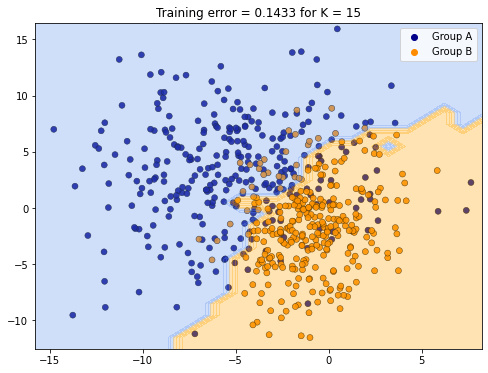

In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from scipy.stats import multivariate_normal
n1, n2 = 300, 300
m1, m2 = np.array([-5, 3]), np.array([-1, -2])
Cov1 = np.array([[15, 1.2], [1.2, 20]])
Cov2 = np.array([[5, 2], [2, 18]])
mvn1 = multivariate_normal(mean = m1, cov = Cov1)
mvn2 = multivariate_normal(mean = m2, cov = Cov2)
A, B = mvn1.rvs(n1), mvn2.rvs(n2)
X = np.vstack((A, B))
y = np.hstack((np.zeros(n1), np.ones(n2))).astype('int')
np.savetxt('demo_data.txt', np.c_[X, y],\
fmt = "%.4f %.4f %d", header = "X1 X2 y")
colors = ['red' if i == 0 else 'blue' for i in y]

cmap_bold = ['darkblue', 'darkorange']
Group_name = np.array(["Group A", "Group B"])
plt.figure(figsize=(8, 6))
sns.scatterplot(x = X[:, 0], y = X[:, 1], \
hue = Group_name[y], palette = cmap_bold, \
alpha = 0.9, edgecolor = "black")


K = 15
weights = 'uniform'
Knn = neighbors.KNeighborsClassifier(K, weights = weights)
Knn.fit(X, y)
trainingErr = 1 - Knn.score(X, y)
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1),\
np.arange(y_min, y_max, 1))
z = Knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = z.reshape(xx.shape)
cmap_light = ListedColormap(['cornflowerblue', 'orange'])
plt.contourf(xx, yy, Z, cmap = cmap_light, alpha = 0.3)
plt.title('Training error = %.4f for K = %i' % (trainingErr,K))